In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Wine.csv')

In [3]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [4]:
X

array([[  1.42300000e+01,   1.71000000e+00,   2.43000000e+00, ...,
          1.04000000e+00,   3.92000000e+00,   1.06500000e+03],
       [  1.32000000e+01,   1.78000000e+00,   2.14000000e+00, ...,
          1.05000000e+00,   3.40000000e+00,   1.05000000e+03],
       [  1.31600000e+01,   2.36000000e+00,   2.67000000e+00, ...,
          1.03000000e+00,   3.17000000e+00,   1.18500000e+03],
       ..., 
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
       [  1.31700000e+01,   2.59000000e+00,   2.37000000e+00, ...,
          6.00000000e-01,   1.62000000e+00,   8.40000000e+02],
       [  1.41300000e+01,   4.10000000e+00,   2.74000000e+00, ...,
          6.10000000e-01,   1.60000000e+00,   5.60000000e+02]])

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Feature Scaling is required by PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#After data preprocessing we do PCA, before fitting the model
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [8]:
pca

PCA(copy=True, n_components=2, whiten=False)

In [9]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
# two variables explains about 50% of variance so n_componets = 2

In [10]:
explained_variance

array([ 0.35952175,  0.19820577])

In [11]:
# Fitting Logistic Regression 

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [14]:
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 3, 2, 2, 2, 3, 3, 1, 1, 3, 1, 1, 2])

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[13,  1,  0],
       [ 1, 11,  4],
       [ 0,  0,  6]])

In [17]:
# plotting principal components

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

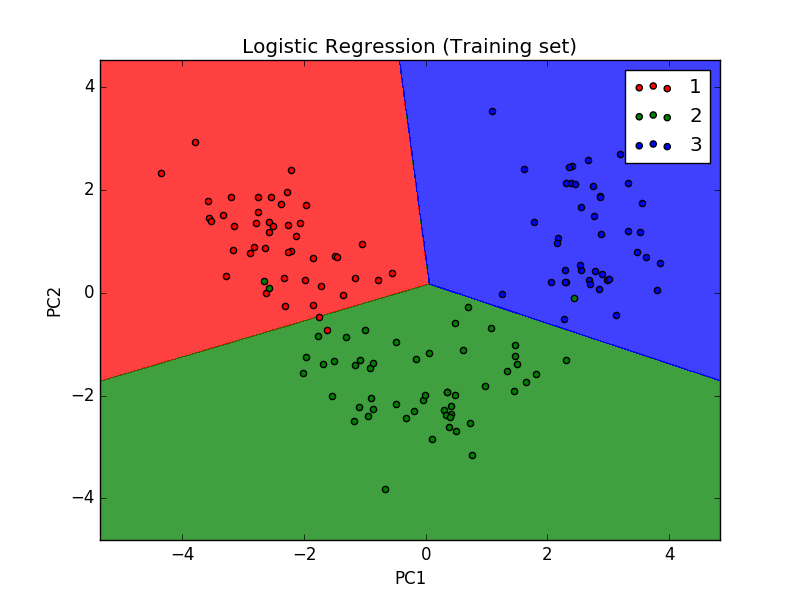

In [18]:
from IPython.display import Image
Image(filename='figure_1.png')